In [10]:
import numpy as np
import matplotlib.pyplot as plt
from datasets.structured import StructuredModule
data_cfg = {
    'data_dir': './data/npy',
    'batch_size': 32,
}
data_module = StructuredModule(**data_cfg)
data_module.setup()
train_loader = data_module.train_dataloader()

    

In [11]:
for batch in train_loader:
    [x, c], y = batch
    u, v, p = y.permute(1, 0, 2, 3)
    
    break

(array([111867., 112309.,  19605.,  28963.,  78795., 929981., 426626.,
        167384.,  47038.,  29624.]),
 array([-2.680737 , -2.680734 , -2.6807308, -2.6807275, -2.6807244,
        -2.6807213, -2.6807182, -2.680715 , -2.6807117, -2.6807086,
        -2.6807055], dtype=float32),
 <BarContainer object of 10 artists>)

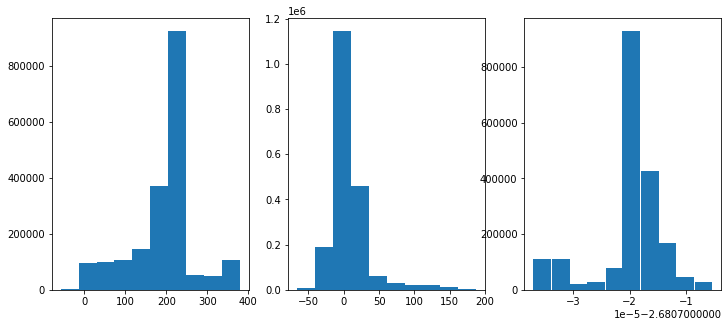

In [22]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.hist(u.flatten().numpy())
plt.subplot(1, 3, 2)
plt.hist(v.flatten().numpy())
plt.subplot(1, 3, 3)
plt.hist(p.flatten().numpy())